In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [24]:
start_date = "2010-01-01"
end_date = "2024-01-01"

tickers = [
    "AC.PA",   # Accor SA
    "AI.PA",   # Air Liquide SA
    "AIR.PA",  # Airbus SE
    "ALO.PA",  # Alstom SA
    "MT.AS",   # ArcelorMittal SA (coté à Amsterdam)
    "CS.PA",   # AXA SA
    "BNP.PA",  # BNP Paribas SA
    "EN.PA",   # Bouygues SA
    "CAP.PA",  # Capgemini SE
    "CA.PA",   # Carrefour SA
    "ACA.PA",  # Crédit Agricole SA
    "BN.PA",   # Danone SA
    "DSY.PA",  # Dassault Systèmes SE
    "ENGI.PA", # Engie SA
    "EL.PA",   # EssilorLuxottica SA
    "ERF.PA",  # Eurofins Scientific SE
    "RMS.PA",  # Hermès International SCA
    "KER.PA",  # Kering SA
    "LR.PA",   # Legrand SA
    "OR.PA",   # L'Oréal SA
    "MC.PA",   # LVMH Moët Hennessy Louis Vuitton SE
    "ML.PA",   # Michelin
    "ORA.PA",  # Orange SA
    "RI.PA",   # Pernod Ricard SA
    "PUB.PA",  # Publicis Groupe SA
    "RNO.PA",  # Renault SA
    "SAF.PA",  # Safran SA
    "SGO.PA",  # Saint-Gobain SA
    "SAN.PA",  # Sanofi SA
    "SU.PA",   # Schneider Electric SE
    "GLE.PA",  # Société Générale SA
    "STLA", # Stellantis NV
    "STM",  # STMicroelectronics NV
    "TEP.PA",  # Teleperformance SE
    "HO.PA",   # Thales SA
    "TTE.PA",  # TotalEnergies SE
    "VIE.PA",  # Veolia Environnement SA
    "DG.PA",   # Vinci SA
    "VIV.PA"   # Vivendi SE
]

data = yf.download(tickers, start=start_date, end=end_date, interval="1mo").get("Close").reset_index()
data["Date"] = data["Date"].dt.strftime("%Y-%m")
data.set_index("Date", inplace=True)

#On transforme le dataframe en rendements mensuels par tickers
for column in data.columns : 
    data[column] = data[column].pct_change()

data.dropna(inplace=True)

[*********************100%***********************]  39 of 39 completed


In [6]:
np.shape(data)

(161, 39)

**Dans un premier temps**

On va tester la stratégie Winner / Looser sur la première période de 18 mois. Quelle est cette stratégie ? 

- Pour une période donnée de 12 mois, on commence par calculer le taux de rentabilité cumulé de chaque titre sur la période.

- On prend les 10 titres avec le plus de rentabilité cumulée, et les 10 titres avec la rentabilité la plus faible, sur la période des 12 mois. Ils constituront **nos portfolios Looser et Winner**

- On étudie la rentabilité des deux portefeuilles sur les 6 mois suivant la période d'analyse.

- On donne le différentiel de rentabilité entre les deux portefeuilles.

In [25]:
#On crée un dataframe pour l'étude des rendements cumulés sur les 12 premiers mois

df_ret = pd.DataFrame()
for column in data.columns:
    #for i in range()
    df_ret.loc[0,column] = data[column].head(12).sum()

#On prend le top 10 et le worst 10 des rendements
top_10 = sorted(df_ret, reverse=True)[:10]
worst_10 = sorted(df_ret)[:10]
print(f"Top 10 : {top_10}")
print(f"Worst 10: {worst_10}")

#On calcule le rendement des 10 top sur les 6 mois suivants 
print("\nRENTA TOP 10 - 6 MOIS APRÈS - LONG STRATEGY \n")
renta_6_after = {}
for element in top_10:
    renta_6_after[element] = data[element].head(19).tail(6).sum().round(3)
    #print(f" Renta sur les 6 mois suivants de {element} : {renta_6_after[element]} €")

renta_top_10 = round(sum(renta_6_after.values()),3)

print(f" PNL total sur les 6 mois suivants : {renta_top_10} €")
print("\n------------------------------------------------------------------------------")
print("\nRENTA WORST 10 - 6 MOIS APRÈS - SHORT STRATEGY \n")

renta_6_after = {}
for element in worst_10:
    renta_6_after[element] = data[element].head(19).tail(6).sum().round(3)
    #print(f" Renta sur les 6 mois suivants de {element} : {renta_6_after[element]} €")

renta_worst_10 = round(sum(renta_6_after.values()),3)

print(f" PNL total sur les 6 mois suivants : {renta_worst_10} €")


Top 10 : ['VIV.PA', 'VIE.PA', 'TTE.PA', 'TEP.PA', 'SU.PA', 'STM', 'STLA', 'SGO.PA', 'SAN.PA', 'SAF.PA']
Worst 10: ['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ALO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA']

RENTA TOP 10 - 6 MOIS APRÈS - LONG STRATEGY 

 PNL total sur les 6 mois suivants : 0.528 €

------------------------------------------------------------------------------

RENTA WORST 10 - 6 MOIS APRÈS - SHORT STRATEGY 

 PNL total sur les 6 mois suivants : 0.707 €


**On généralise le code précédent pour toutes les périodes entre 2010 et 2024.**

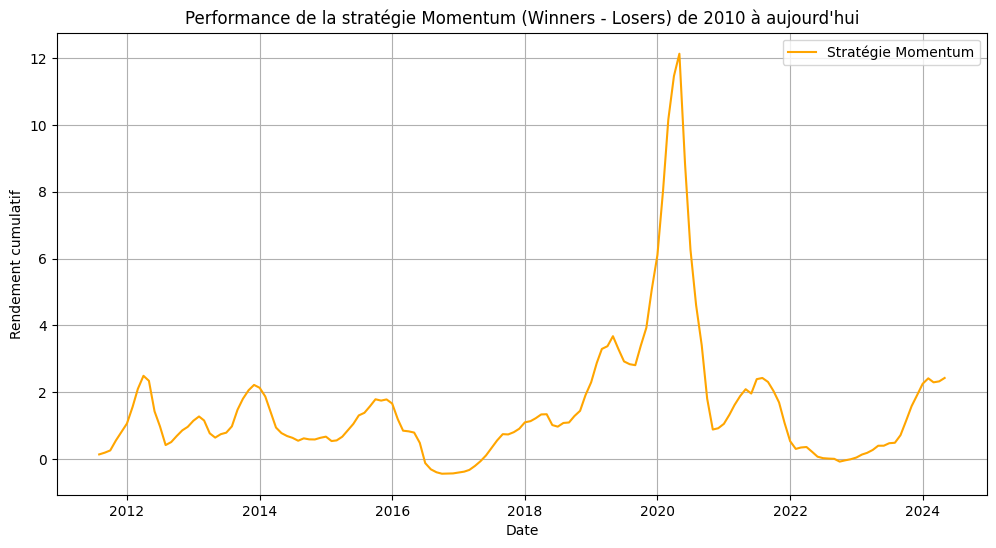

In [26]:
# Initialisation de la liste pour stocker les rendements de la stratégie
momentum_returns = []

# On fait une boucle sur les périodes pour créer des portefeuilles mensuels qui se chevauchent
for i in range(formation_period, len(returns) - investment_period + 1):
    # On prend la période de formation
    formation_data = returns.iloc[i - formation_period:i]
    # On calcule les rendements cumulés sur la période de formation
    cumulative_returns = (1 + formation_data).prod() - 1
    # On trie selon les rendements cumulés
    sorted_returns = cumulative_returns.sort_values(ascending=False)

    # Sélection des 10 meilleures (winners) et 10 pires (losers) actions
    top_10 = sorted_returns.head(10).index
    bottom_10 = sorted_returns.tail(10).index
    # Période d'investissement
    investment_data = returns.iloc[i:i + investment_period]
    # Calcul des rendements cumulés sur la période d'investissement
    top_returns = (1 + investment_data[top_10]).prod(axis=0) - 1
    bottom_returns = (1 + investment_data[bottom_10]).prod(axis=0) - 1

    # Calcul du rendement moyen des portefeuilles winners et losers
    avg_top_return = top_returns.mean()
    avg_bottom_return = bottom_returns.mean()
    # Rendement de la stratégie momentum (long sur winners, short sur losers)
    momentum_return = avg_top_return - avg_bottom_return
    # Stockage du rendement de la stratégie pour cette période
    momentum_returns.append(momentum_return)


momentum_returns = pd.Series(momentum_returns, name='Rendement Momentum')

# On calcule le rendement cumulatif de la stratégie
cumulative_momentum_returns = (1 + momentum_returns).cumprod() - 1

# Création d'un index de dates pour l'axe des abscisses
dates = returns.index[formation_period:len(returns) - investment_period + 1]

# Visualisation du rendement cumulatif de la stratégie
plt.figure(figsize=(12,6))
plt.plot(dates, cumulative_momentum_returns, label='Stratégie Momentum', color='orange')
plt.title('Performance de la stratégie Momentum (Winners - Losers) de 2010 à aujourd\'hui')
plt.xlabel('Date')
plt.ylabel('Rendement cumulatif')
plt.legend()
plt.grid(True)
plt.show()